In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

with np.load("mnist.npz") as data:
    X_train_full = data['x_train']
    y_train_full = data['y_train'] ##label
    X_test = data['x_test']
    y_test = data['y_test']
    
X_train_full.shape
X_train_full.dtype

dtype('uint8')

## Scale the pixel intensities down to 0-1

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Sneaker'

## Lets build the Neural Network

In [4]:
from tensorflow.keras.layers import ReLU 
relu = ReLU
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()

/Users/limenwee/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile( loss = "sparse_categorical_crossentropy"  , optimizer = "sgd" , metrics = ["accuracy"] )

In [6]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.7292 - loss: 1.0299 - val_accuracy: 0.9132 - val_loss: 0.3025
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9124 - loss: 0.3071 - val_accuracy: 0.9332 - val_loss: 0.2425
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9318 - loss: 0.2422 - val_accuracy: 0.9448 - val_loss: 0.1980
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.9422 - loss: 0.2056 - val_accuracy: 0.9518 - val_loss: 0.1757
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.9502 - loss: 0.1779 - val_accuracy: 0.9570 - val_loss: 0.1561
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.9548 - loss: 0.1568 - val_accuracy: 0.9614 - val_loss: 0.1416
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9597 - loss: 0.1408 - val_accuracy: 0.9652 - val_loss: 0.1313
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9640 -

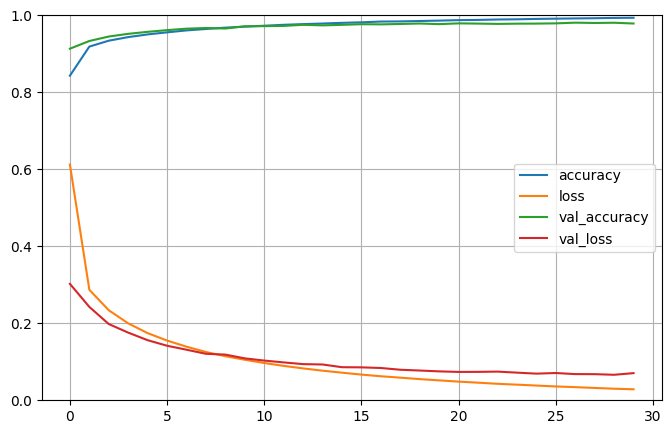

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [10]:
model.save("my_keras_model.keras")